# Détection des bio-marqueurs pour le cancer colorectal

## Etudiants
- Potet Bastien
- Kot Chau Ying

In [1]:
import os
import numpy as np
import pylab as plt
%matplotlib inline
import pandas as pd

In [2]:
import numpy as np
from Bio import Geo

def load_geo(myfile):
    handle = open(myfile)
    records = Geo.parse(handle)
    return records

records = load_geo('data/GSE21510_family.soft')

In [3]:
nr = next(records)
print(nr)
print('\n---------------------- ENTITY_ATTRIBUTES:------------------------------\n')
print(nr.entity_attributes)

GEO Type: DATABASE
GEO Id: GeoMiame
Database_email: geo@ncbi.nlm.nih.gov

Database_institute: NCBI NLM NIH

Database_name: Gene Expression Omnibus (GEO)

Database_web_link: http://www.ncbi.nlm.nih.gov/geo

Column Header Definitions


---------------------- ENTITY_ATTRIBUTES:------------------------------

{'Database_name': 'Gene Expression Omnibus (GEO)', 'Database_institute': 'NCBI NLM NIH', 'Database_web_link': 'http://www.ncbi.nlm.nih.gov/geo', 'Database_email': 'geo@ncbi.nlm.nih.gov'}


In [4]:
# start by re-loading the data
records = load_geo('data/GSE21510_family.soft')


id_cond = {}

dict_gene = dict()

values = []
exp_id = []
id_ref = []

# loop over records
for r in records:

    rea = r.entity_attributes

    if 'Sample_characteristics_ch1' in rea :
        sample = rea['Sample_description'][1]
        desc = rea["Sample_characteristics_ch1"]
        id_cond[sample] = desc

    if 'sample_table_begin' in rea:
        val = np.array(r.table_rows)
        if len(id_ref) == 0:
            id_ref = val[1:,0]
        values.append(val[1:,1])
        exp_id.append(r.entity_attributes['Sample_description'][1])

    if 'platform_table_begin' in rea :
        for i in r.table_rows :
            dict_gene[i[0]] = i[1]




In [5]:
# converts data to an array (more practical to handle)
values = np.array(values)

data = [id_ref]
for val in values:
    data.append(val)
    
exp_id = np.array(exp_id)
exp_id = np.insert(exp_id, 0, 'name_gene')

data = np.array(data)

data = np.insert(data, 0, exp_id, axis=1)

In [6]:
metastatis_list = []
stage_list = []
tissue_list = []

for k in id_cond:
    v = id_cond[k]
    metastatis = v[0].split(':')[1].strip()
    stage = v[1].split(':')[1].strip()
    tissue = v[2].split(':')[1].split(',')[0].strip()
    
    metastatis_list.append(metastatis)
    stage_list.append(stage)
    tissue_list.append(tissue)
    
    id_cond[k] = [metastatis, stage, tissue]

metastatis_list = list(set(metastatis_list))
stage_list = list(set(stage_list))
tissue_list = list(set(tissue_list))

In [7]:
print(metastatis_list)
print(stage_list)
print(tissue_list)

['metastasis', 'none', 'metastatic recurrence']
['3b', '4', '1', '3c', '0', '2a', '3a', '2b']
['normal', 'cancer']


In [8]:
'''
import random
k = 6
idx_test = random.sample(range(len(id_cond)), k)
idx_train = list(range(0, len(id_cond) + 2))
[idx_train.remove(i) for i in idx_test]

data_test = data[idx_test, :]
data = data[idx_train, :]

print(np.shape(data))
print(np.shape(data_test))
'''

'\nimport random\nk = 6\nidx_test = random.sample(range(len(id_cond)), k)\nidx_train = list(range(0, len(id_cond) + 2))\n[idx_train.remove(i) for i in idx_test]\n\ndata_test = data[idx_test, :]\ndata = data[idx_train, :]\n\nprint(np.shape(data))\nprint(np.shape(data_test))\n'

14

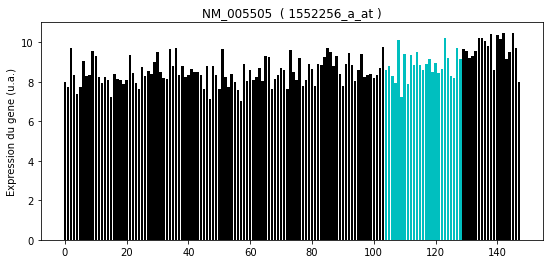

In [9]:


def plot_gene_expression_across_conditions(data,gene,tissue_type):
    
    # find the line in data corresponding to our gene of interest and get the gene expression levels
    idx_gene = [i for i,x in enumerate(data[0]) if x==gene][0]
    
    data_to_show = (data[1:,idx_gene]).tolist() # remove the first two elements corresponding to gene name and identifier
    data_to_show = np.array(data_to_show,dtype=float) # convert to float
    
    colors_tissue = []
    
    for i, v in enumerate(data_to_show):
        if id_cond[data[i+1][0]][2] == 'cancer':
            colors_tissue.append('k')
        else:
            colors_tissue.append('c')
    
    # plot the data
    fig, ax = plt.subplots(figsize=(9,4))
    plt.bar(range(0,len(data_to_show)),data_to_show, color = colors_tissue)
    plt.title(dict_gene[data[0,idx_gene]]+'  ( '+data[0,idx_gene]+' )')
    # ax.set_xticks([5,15,23,31,47])
    # ax.set_xticklabels([ct.replace(' ','\n').replace('plus','+') for ct in tissue_type])
    ax.set_ylabel('Expression du gene (u.a.)')
    
    return idx_gene

# gene of interest
gene = '1552256_a_at' 
# gene = '206067_s_at'
plot_gene_expression_across_conditions(data,gene,tissue_list)

In [10]:
desired_profile = [1 if id_cond[s][2] =='cancer' else 0 for s in data[1:,0]]
print('desired_profile = '+str(desired_profile))

desired_profile = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Text(0.5, 1.0, 'Desired profile')

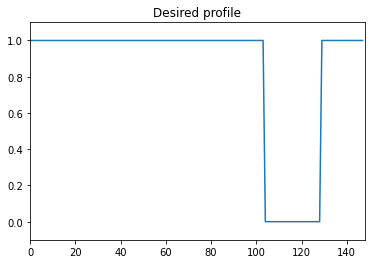

In [11]:
fig = plt.figure()

# plot desired_profile
plt.plot(desired_profile)
plt.ylim([-0.1,1.1])
plt.xlim([0,len(desired_profile)])
plt.title('Desired profile')

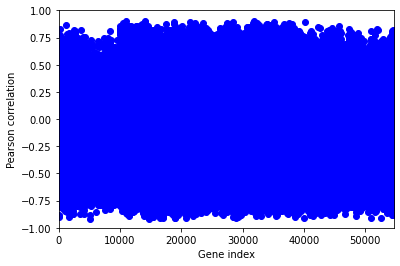

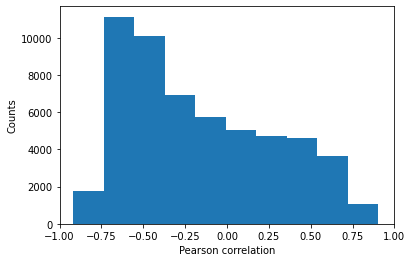

In [15]:
def pearson_genes(data,desired_profile,show_plot=1):

    import scipy.stats as ss

    correl = [] # contains the correlation for each gene
    correl_p  = [] # for now, do not try to understand what correl_p is...
    
    # loop over genes
    for i in range(np.shape(data)[1]-1): # do not consider first line of data (=header)
        
        gene_expression = data[1:,i+1] # do not consider first two columns (= gene identifiers)
        gene_expression = np.array(gene_expression,dtype=float) # convert to float
        
        pearson_corr = ss.pearsonr(gene_expression,desired_profile) # calculate Pearson correlation
        correl.append(pearson_corr[0])
        correl_p.append(pearson_corr[1]) # forget about this for now...
        
    correl = np.array(correl,dtype=float) # convert to array... easier to manipulate
    
    # plot correlation values
    if show_plot:
        fig = plt.figure()
        plt.plot(correl,'bo')
        plt.ylim([-1,1])
        plt.xlim([0,len(correl)])
        plt.xlabel('Gene index')
        plt.ylabel('Pearson correlation')
        plt.show()
        
        plt.figure()
        plt.hist(correl)
        plt.xlabel('Pearson correlation')
        plt.ylabel('Counts')
        plt.xlim([-1,1])
        plt.show()

    return (correl,correl_p)

co = pearson_genes(data,desired_profile)
corr = co[0]

In [32]:
def shuffle_data(data):
    
    from random import shuffle
    
    # get shuffled columns indexes
    shuffled_idx = list(range(1,np.shape(data)[1])) # ! do not shuffle the first two colums (= gene identifiers)
    shuffle(shuffled_idx) # shuffled_idx is now shuffled
    shuffled_idx.insert(0,0)
    
    # use shuffled_idx to randomize the columns of data
    data_random = data[:,shuffled_idx]
    data_random[0,:] = data[0,:] # put label conditons on top again

    return data_random
    
data_random = shuffle_data(data)
print(str(data[3,0:5])+' = un gène NON randomisé')
print(str(data_random[3,0:5])+' = le même gène avec les conditions randomisées')

['C101' '10.33385093' '7.078174158' '5.936283323' '7.819676468'] = un gène NON randomisé
['C101' '4.755732889' '6.359592788' '3.566669626' '5.836354889'] = le même gène avec les conditions randomisées


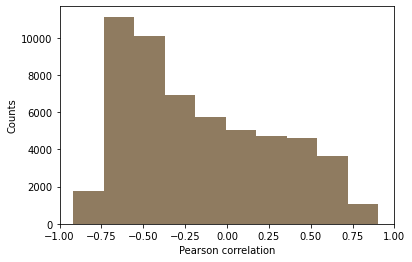

In [34]:
def histogram_pearson(data, desired_profile):
    co_ra = pearson_genes(data_random,desired_profile,show_plot=0)
    corr_ra = co_ra[0]

    plt.figure()
    plt.hist(corr)
    plt.hist(corr_ra,alpha=0.5)
    plt.xlabel('Pearson correlation')
    plt.ylabel('Counts')
    plt.xlim([-1,1])
    plt.show()
    
histogram_pearson(data_random, desired_profile)